In [ ]:
import pandas as pd
df = pd.read_csv('../../data processing/balancedData.csv')
pd.set_option("display.max_columns", None)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,3,17.0,23.6,1.5,9.8,11.8,14,40.0,8,14,20,15.0,94,86,1005.9,1021.7,3.0,2.0,18.4,20.8,True,False,11
1,5,10.5,21.0,1.5,0.4,9.5,15,40.0,1,1,16,9.0,52,41,1011.0,1020.9,2.0,1.0,16.0,10.6,True,False,11
2,4,13.9,21.5,1.5,8.6,3.0,1,29.0,4,0,19,18.0,94,55,1014.1,1016.0,5.0,0.0,20.5,20.3,True,False,12
3,10,13.7,28.7,0.2,9.2,2.0,8,25.0,6,3,17,13.0,86,35,1022.5,1013.9,0.0,3.0,14.1,15.4,True,False,3
4,1,18.3,26.7,1.5,14.3,2.1,3,50.0,11,4,7,18.0,77,75,1005.8,1018.6,8.0,3.0,25.7,19.2,True,False,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8346,4,20.2,34.4,1.5,9.2,10.3,0,45.0,8,12,9,16.0,94,84,1005.5,1022.9,1.0,1.0,24.9,32.4,True,True,12
8347,5,22.9,36.6,1.5,11.9,10.2,5,39.0,14,12,20,18.0,59,80,1016.0,1005.3,5.0,7.0,32.8,34.9,True,True,2
8348,9,27.5,37.4,1.5,7.2,4.5,3,25.0,7,15,18,18.0,85,84,1022.5,1011.7,5.0,0.0,32.3,36.8,True,True,4
8349,6,22.0,28.8,1.5,7.8,7.0,7,20.0,14,13,5,11.0,96,80,1023.7,1010.0,5.0,4.0,24.4,22.9,True,True,5


In [21]:
X = df.drop(["RainTomorrow"], axis=1)
Y = df["RainTomorrow"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)


In [22]:
len(X.columns)

22

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
from xgboost import XGBClassifier
params_xgb ={'n_estimators': 500,
            'max_depth': 16}
model_xgb = XGBClassifier(**params_xgb)

In [25]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

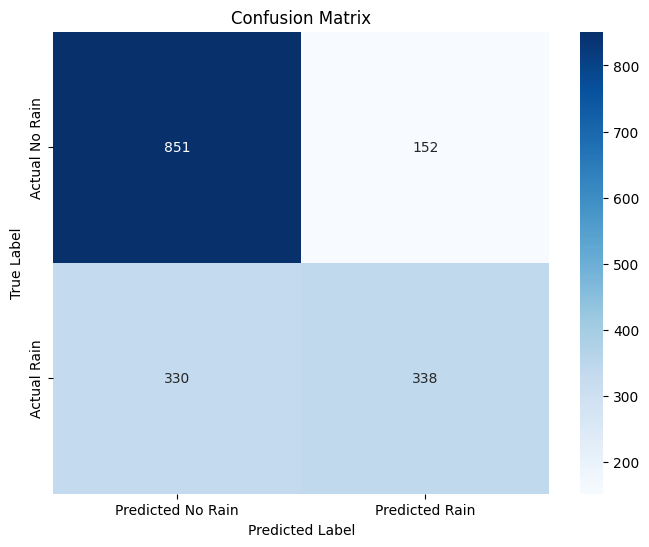

              precision    recall  f1-score   support

       False    0.72058   0.84845   0.77930      1003
        True    0.68980   0.50599   0.58377       668

    accuracy                        0.71155      1671
   macro avg    0.70519   0.67722   0.68153      1671
weighted avg    0.70827   0.71155   0.70114      1671



In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model_xgb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(y_test,y_pred,digits=5))

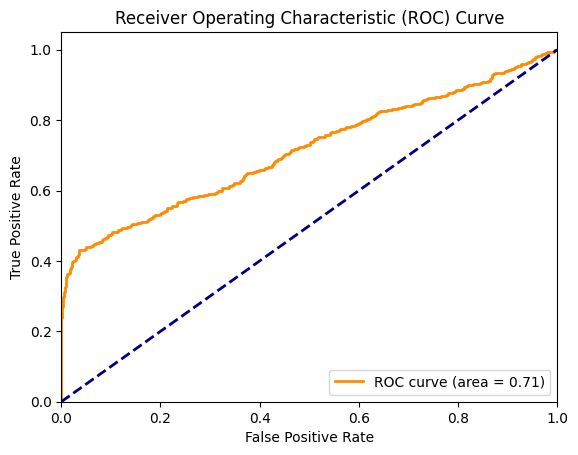

In [27]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model_xgb.predict_proba(X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
import joblib
joblib.dump(model_xgb, 'xgb.pkl')

['xgb.pkl']

In [29]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)